In [1]:
# скачаем данные о посещаемости избирательных участков
import requests
import xlrd
url = ("http://www.vybory.izbirkom.ru/servlet/ExcelReportVersion?" + 
            "region=0&sub_region=0&root=1&global=1&" + 
            "vrn=100100084849062&tvd=100100084849066&" + 
            "type=453&vibid=100100084849066&condition=&" + 
            "action=show&version=null&prver=0&sortorder=0"
      )
c = requests.get(url).content
rb = xlrd.open_workbook(file_contents=c)
sheet = rb.sheet_by_index(0)
data12 = [float(sheet.row_values(i)[-3][:-1]) for i in range(13, 98)]
data18 = [float(sheet.row_values(i)[-1][:-1]) for i in range(13, 98)]

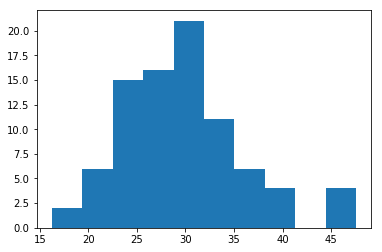

Значения: [  2.   6.  15.  16.  21.  11.   6.   4.   0.   4.]
Границы: [ 16.24   19.374  22.508  25.642  28.776  31.91   35.044  38.178  41.312
  44.446  47.58 ]


In [2]:
# построим гистограмму этих данных
import matplotlib.pyplot as plt
bins = 10
h = plt.hist(data12, bins)
plt.show()
print("Значения:", h[0])
print("Границы:", h[1])

In [6]:
μ_ = sum(data12) / len(data12)
σ2_ = sum( (x-μ_) ** 2 for x in data12 ) / len(data12)
print('(μ\', σ2\') = ({}, {})'.format(μ_, σ2_))

from scipy.stats import norm, chi2
N = norm(μ_, σ2_ ** .5)
χ2 = chi2(bins - 1)
# cdf - это значения функции распределения, 
# pdf - функции плотности
P = []
for i in range(bins):
    P.append(N.cdf(h[1][i+1]) - N.cdf(h[1][i]))

X2n = 0.0
for i in range(bins):
    X2n += (h[0][i] / len(data12) - P[i]) ** 2 / P[i]
X2n *= len(data12)
print('X2n =', X2n)

p_value = 1 - χ2.cdf(X2n)
print("Вероятность отклонить корректную H0: {:.2f}%".format(p_value * 100))
# NB: Запомните, это абсолютно ничего не говорит о тот, что гипотеза H0 верна!!!
# Это сложно принять

(μ', σ2') = (29.65352941176471, 39.765700484429075)
X2n = 25.0410643057
Вероятность отклонить корректную H0: 0.29%


In [7]:
# конечно же провести тест на нормальное распределение можно и гораздо проще :)
from scipy import stats
stats.normaltest(data12)

NormaltestResult(statistic=9.9619893694802855, pvalue=0.0068672284318312526)